# 1.0 Data Import and Exploration

In [11]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
x = heart_disease.data.features 
y = heart_disease.data.targets  
# variable information
print(heart_disease.variables)
print(x)


        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

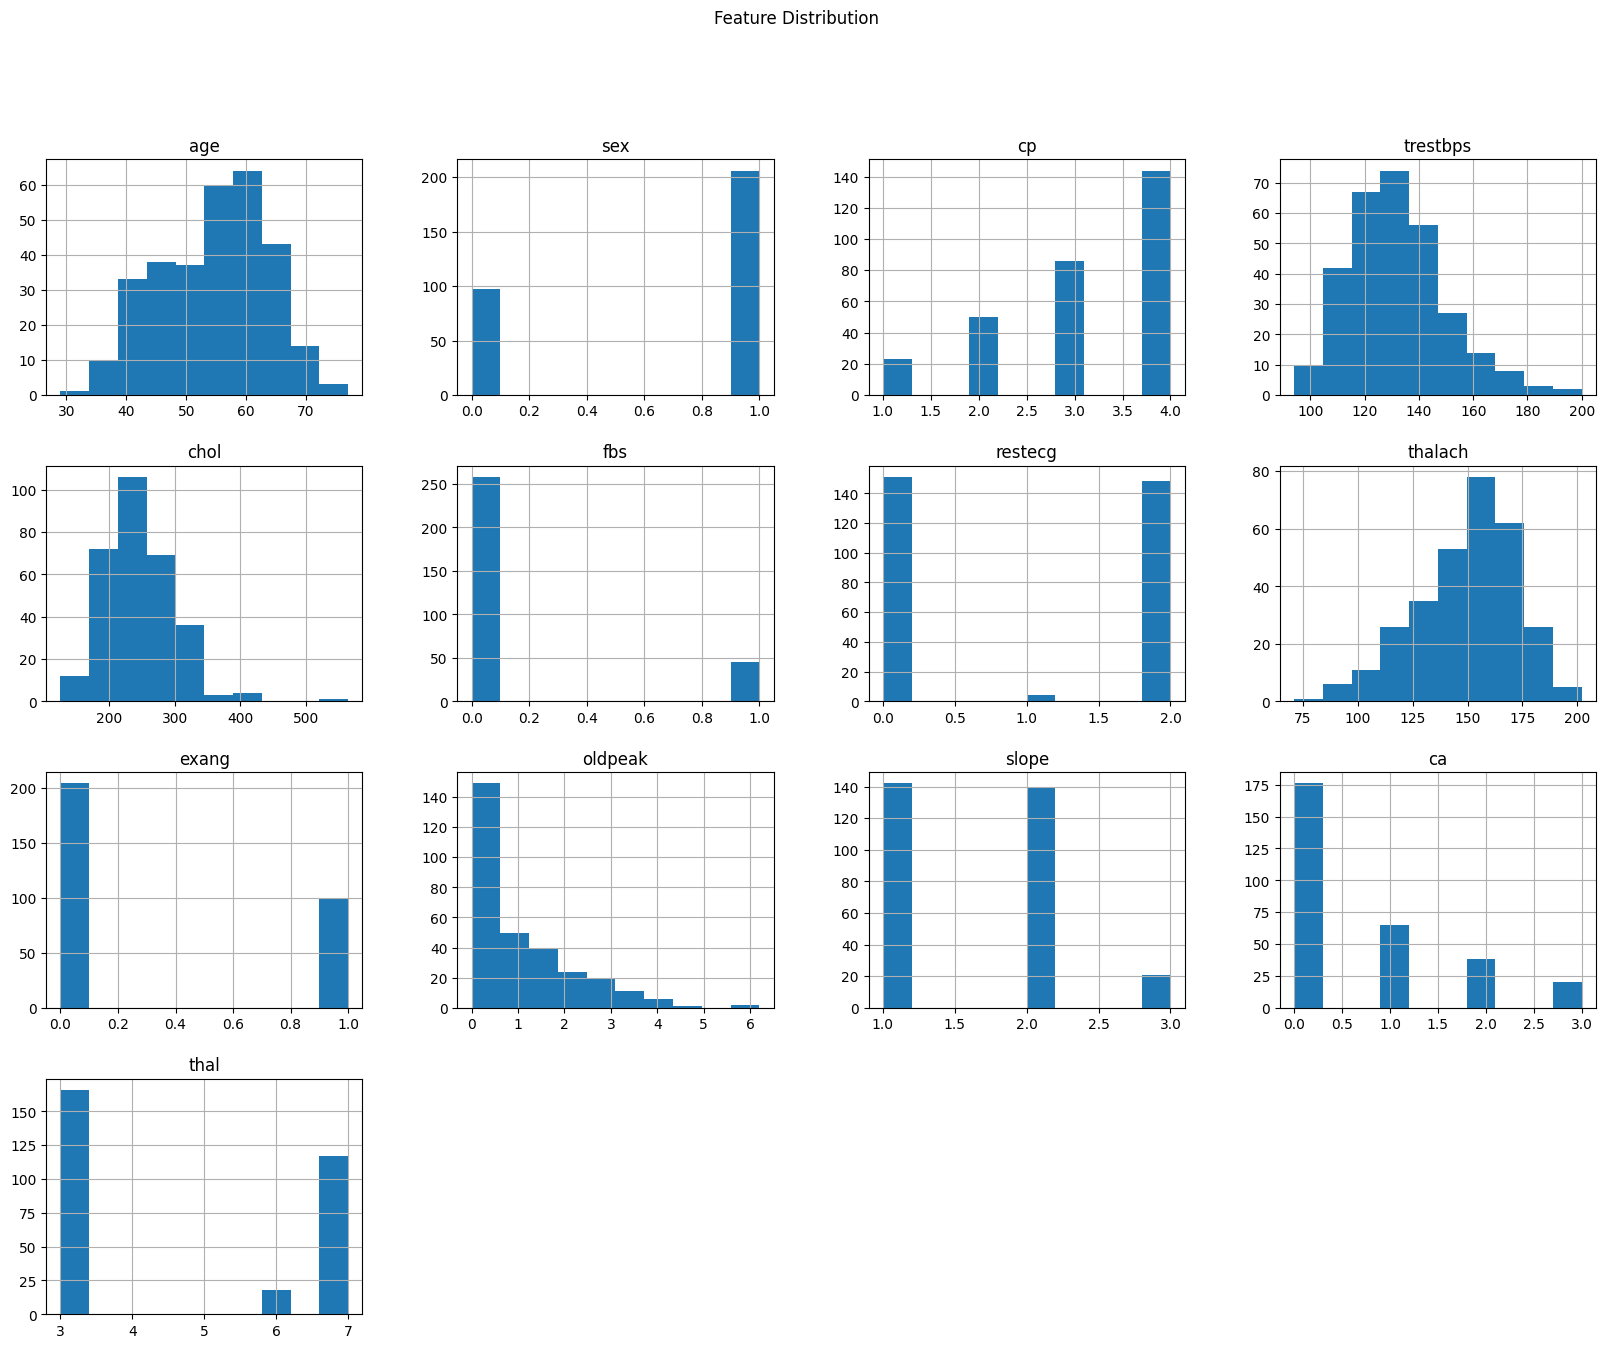

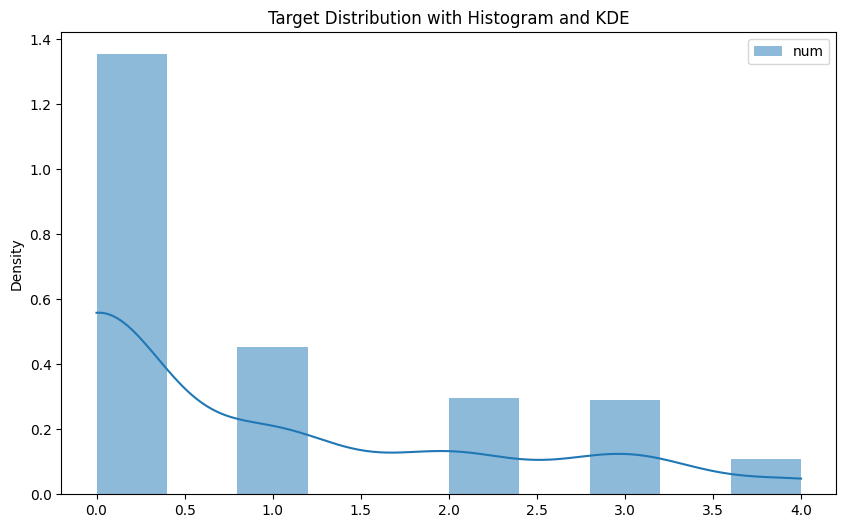

In [13]:
x.hist(figsize=(20, 15))
plt.suptitle('Feature Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, stat="density", linewidth=0)
plt.title('Target Distribution with Histogram and KDE')
plt.show()

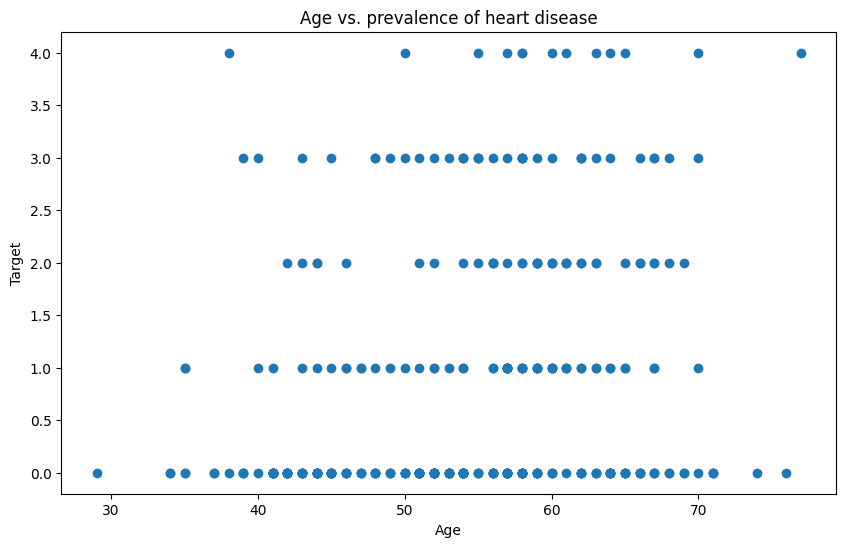

In [18]:
# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(x['age'], y)
plt.title('Age vs. prevalence of heart disease')
plt.xlabel('Age')
plt.ylabel('Target')
plt.show()

# 2.0 Data preprocessing and encoding

## 2.1 Handling missing values

In [20]:
print(type(x))
missing_values_count = x.isnull().sum()
print(missing_values_count)

<class 'pandas.core.frame.DataFrame'>
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64


In [21]:
#there are 6rows in total with null values (4 ca and 2 thal), replace null values with the median of the row
x = x.fillna(x.median())
missing_val = x.isnull().sum()
print(missing_val)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


## 2.2 Encoding categorical values

In [22]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang']
x_encoded = pd.get_dummies(x, columns=categorical_cols)
print(x_encoded)

     age  trestbps  chol  thalach  oldpeak  slope   ca  thal  sex_0  sex_1  \
0     63       145   233      150      2.3      3  0.0   6.0  False   True   
1     67       160   286      108      1.5      2  3.0   3.0  False   True   
2     67       120   229      129      2.6      2  2.0   7.0  False   True   
3     37       130   250      187      3.5      3  0.0   3.0  False   True   
4     41       130   204      172      1.4      1  0.0   3.0   True  False   
..   ...       ...   ...      ...      ...    ...  ...   ...    ...    ...   
298   45       110   264      132      1.2      2  0.0   7.0  False   True   
299   68       144   193      141      3.4      2  2.0   7.0  False   True   
300   57       130   131      115      1.2      2  1.0   7.0  False   True   
301   57       130   236      174      0.0      2  1.0   3.0   True  False   
302   38       138   175      173      0.0      1  0.0   3.0  False   True   

     ...   cp_2   cp_3   cp_4  fbs_0  fbs_1  restecg_0  restecg

## 2.3 Scale Features

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_encoded)
x_scaled_df = pd.DataFrame(x_scaled, columns=x_encoded.columns)
print(x_scaled_df)


          age  trestbps      chol   thalach   oldpeak     slope        ca  \
0    0.948726  0.757525 -0.264900  0.017197  1.087338  2.274579 -0.711131   
1    1.392002  1.611220  0.760415 -1.821905  0.397182  0.649113  2.504881   
2    1.392002 -0.665300 -0.342283 -0.902354  1.346147  0.649113  1.432877   
3   -1.932564 -0.096170  0.063974  1.637359  2.122573  2.274579 -0.711131   
4   -1.489288 -0.096170 -0.825922  0.980537  0.310912 -0.976352 -0.711131   
..        ...       ...       ...       ...       ...       ...       ...   
298 -1.046013 -1.234430  0.334813 -0.770990  0.138373  0.649113 -0.711131   
299  1.502821  0.700612 -1.038723 -0.376896  2.036303  0.649113  1.432877   
300  0.283813 -0.096170 -2.238149 -1.515388  0.138373  0.649113  0.360873   
301  0.283813 -0.096170 -0.206864  1.068113 -0.896862  0.649113  0.360873   
302 -1.821745  0.359134 -1.386944  1.024325 -0.896862 -0.976352 -0.711131   

         thal     sex_0     sex_1  ...      cp_2      cp_3      cp_4  \
0  

# 3.0 Clustering

## 3.1 K-means clustering
- The implementation here starts with k=3 for low, medium and high since the aim is to identify patients with a high risk of developing heart disease. This will later be refined usin the Elbow method or silhouette score.

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

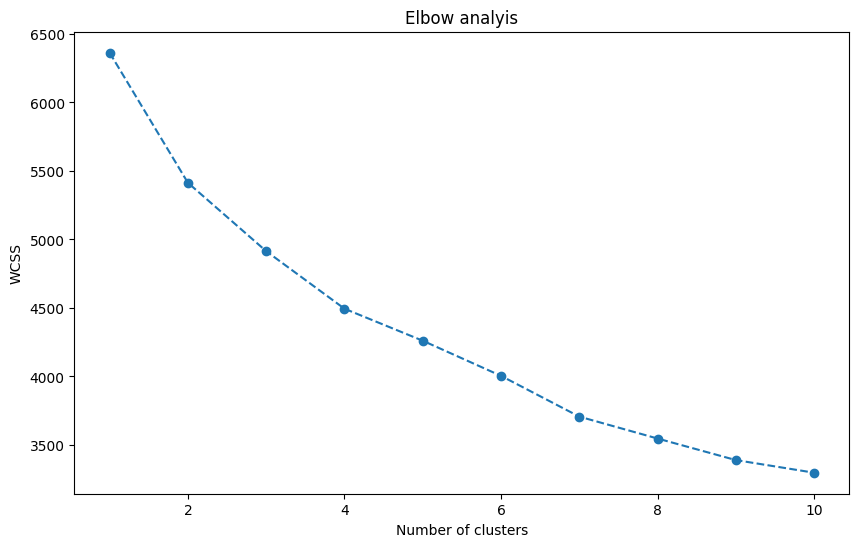

In [36]:
from sklearn.cluster import KMeans
k = 5 
kmeans = KMeans(n_clusters=k, random_state=42)
#fit kmeans model to x_scaled
kmeans.fit(x_scaled)
# assign cluster to each datapoint
clusters = kmeans.predict(x_scaled)

#use elbow method to evaluate clustering

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow analyis')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [37]:
#having adjusted the clusters from 3 to five, analyze the centroids
centroids = kmeans.cluster_centers_
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca', 'thal',
       'sex_0', 'sex_1', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'fbs_0', 'fbs_1',
       'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1']
centroid_df = pd.DataFrame(centroids, columns=features)
print(centroid_df)

        age  trestbps      chol   thalach   oldpeak     slope        ca  \
0  0.177257 -0.087414  0.005566 -1.070770  0.750555  0.586595  0.443334   
1 -0.439769 -0.176518 -0.305867  0.440912 -0.049390 -0.259235 -0.143600   
2 -0.129910 -0.227070  0.241954  0.227380 -0.474141 -0.217802 -0.460997   
3  0.967196  0.390752  0.519670 -0.296618  0.924384  0.468506  1.373321   
4  0.727089  0.501417  0.291285 -1.044666  1.453984  1.055480  0.360873   
5 -0.512068 -0.220344 -0.099584  0.739702 -0.618446 -0.459159 -0.491858   
6  0.266316  0.419043  0.025283 -0.123386  0.045293  0.135808  0.473715   
7  0.062176 -0.051562 -0.248692  0.045600 -0.320954 -0.273448 -0.276535   
8 -0.183553 -0.348567  0.400419  0.323714 -0.660558 -0.340300 -0.524696   
9  0.158540  0.522450 -0.184995  0.278022  0.303410  0.225079 -0.198434   

       thal     sex_0     sex_1  ...      cp_2      cp_3      cp_4     fbs_0  \
0  0.759379 -0.686202  0.686202  ... -0.392747 -0.501572  0.896758  0.417635   
1 -0.221506 -0

### 3.1.1 K-means clustering PCA Visualization

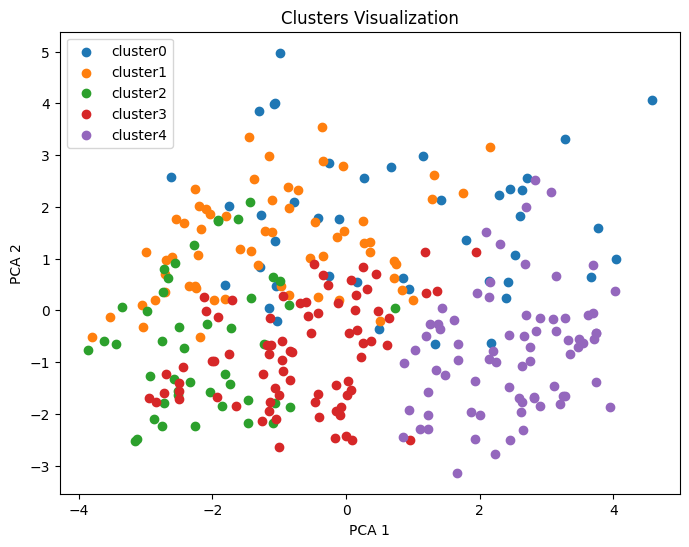

In [38]:
#visualize kmeans cluster using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

x_pca = pca.fit_transform(x_scaled)

plt.figure(figsize=(8,6))

for i in range(k):
    plt.scatter(x_pca[clusters == i, 0], x_pca[clusters == i, 1], label=f'cluster{i}')
plt.legend()
plt.title('Clusters Visualization')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## 3.2  Hierarchical Clustering

- Key concepts to understand here include:
    - *linkage matrix*: key output of hierachichal clustering algs. Contains information about pairwise distances between elements/clusters and the sequence in which they are merged.
    - *Dendogram* : constructed from the linkage matrix. It is a tree diagram that visually represents the process of cluster merging. Relevant in visualizing the hierachy of structure which then helps in determining the appropriate number of clusters.

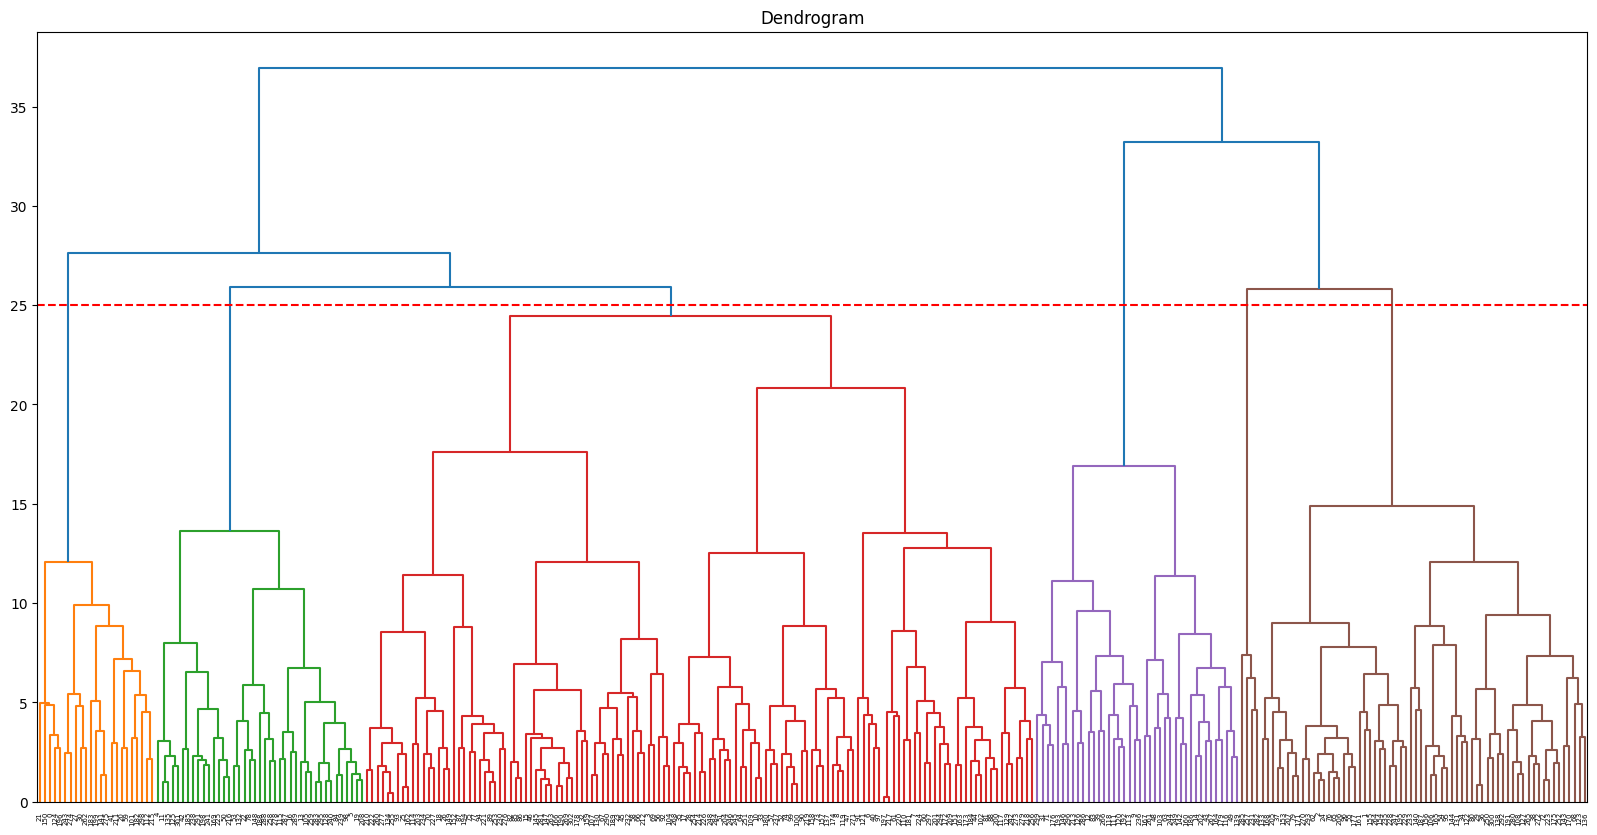

In [54]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

#linkage matrix 

Z = linkage(x_scaled, method='ward')

#dendrogram

plt.figure(figsize = (20, 10))
plt.title("Dendrogram")
dendrogram(Z)
plt.axhline(y=25, color='r', linestyle='--')
plt.show()

### 3.2.1 Dendrogram interpretation
- Threshold line drawn at 25 
- clusters determined at this threshold = 6

### 3.2.2 Agglomerative clustering

In [80]:
n_clusters = 6
cluster = AgglomerativeClustering(n_clusters, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(x_scaled)


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


### 3.2.3 Cluster Analysis

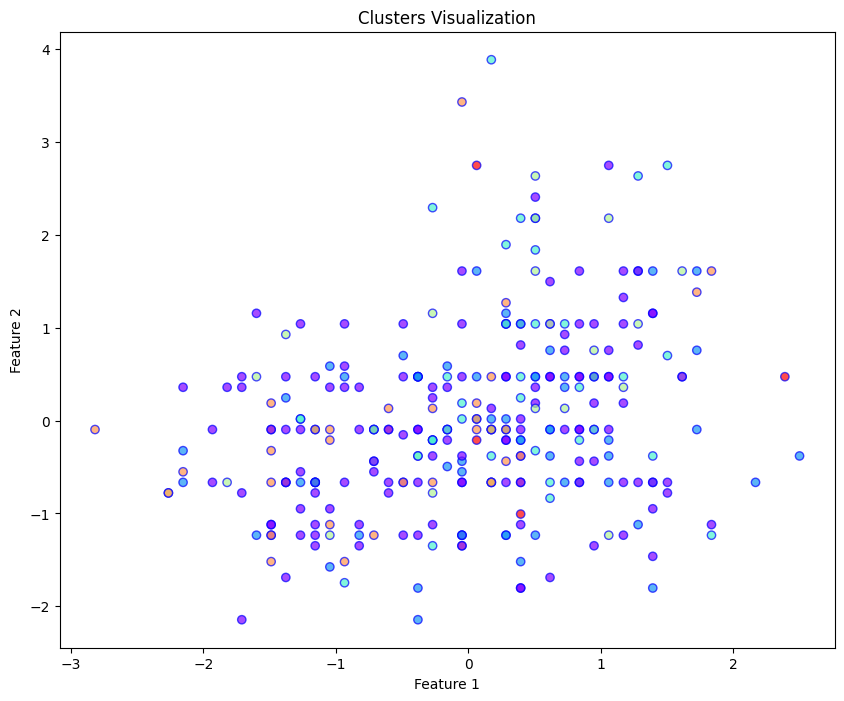

In [81]:
plt.figure(figsize=(10, 8))
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=cluster_labels, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.title('Clusters Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [82]:
silhouette_avg = silhouette_score(x_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.141


### 3.2.4 Observations and Ammendments

- After printing the silhouette score with the initially determined clusters (*see dendrogram above*), the silhouette score is determined to be 0.141
- This score is relatively poor which means either of two things:
    - The data does not naturally cluster well with the chosen parameters
    - The hierachichal clustering algorithm above and its settings are not optimal for the dataset herein
- To improve the clustering, the follwowing approaches were used: 
    - Ammended the number of clusters *n_clusters* using the iteration loop below. 
    - A function **def find_best_linkage** that iterates between different linkages to determine the linkage that produces the best perfoming linkage matrix (see code below). The best perfoming number of clusters in the previous method is used as the optimal when calling this function

In [77]:
best_score = -1
best_n_clusters = 0

for n_clusters in range(2, 11):  # Trying different numbers of clusters
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(x_scaled)
    silhouette_avg = silhouette_score(x_scaled, cluster_labels)
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg:.3f}")
    
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_n_clusters = n_clusters

print(f"Best Silhouette Score: {best_score:.3f} with {best_n_clusters} clusters")

Number of clusters: 2, Silhouette Score: 0.133
Number of clusters: 3, Silhouette Score: 0.150
Number of clusters: 4, Silhouette Score: 0.169
Number of clusters: 5, Silhouette Score: 0.132
Number of clusters: 6, Silhouette Score: 0.141
Number of clusters: 7, Silhouette Score: 0.154
Number of clusters: 8, Silhouette Score: 0.149
Number of clusters: 9, Silhouette Score: 0.150
Number of clusters: 10, Silhouette Score: 0.161
Best Silhouette Score: 0.169 with 4 clusters


In [79]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

def find_best_linkage(x_scaled, n_clusters=4):
    best_score = -1
    best_linkage = None
    linkages = ['ward', 'complete', 'average', 'single']
    
    for linkage in linkages:
        clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        cluster_labels = clustering.fit_predict(x_scaled)
        score = silhouette_score(x_scaled, cluster_labels)
        print(f"Linkage: {linkage}, Silhouette Score: {score:.3f}")
        
        if score > best_score:
            best_score = score
            best_linkage = linkage
    
    print(f"\nBest Linkage: {best_linkage} with a Silhouette Score of {best_score:.3f}")
find_best_linkage(x_scaled, n_clusters=4)

Linkage: ward, Silhouette Score: 0.169
Linkage: complete, Silhouette Score: 0.096
Linkage: average, Silhouette Score: 0.168
Linkage: single, Silhouette Score: 0.409

Best Linkage: single with a Silhouette Score of 0.409


### 3.2.4 Results and optimal hierachichal clustering algorithm

- After iterating through the different linkages, the **single** linkage produces the highest linkage matrix with a silhouette score of 0.41. 
- Therefore, the optimal hierachichal cluster algorithm has the following parameters: 
    - linkage = Single
    - number of cluster = 4 
    - Resulting Silhouette score = 409

## 3.3 Density-Based Spatial Clustering of Applications with Noise (DBSCAN)